<a href="https://colab.research.google.com/github/timothylombard/RSB/blob/master/RSB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **-1-**
## **Analytic Approach to Project Management of PCB Designs**


---




The document you are reading is a Jupyter notebook, hosted in [Colaboratory.](https://colab.research.google.com/) It is not a static page, but an interactive environment that runs real code! <br>  

The graphs in this notebook can be changed by updating variables  in the agreement form. 

 Use it, modify it, have fun!  Note: the [usual and customary restrictions apply.](https://github.com/timothylombard/RSB/blob/master/LICENSE) <br> 
 
 Comments or suggestions:  timothylombard@gmail.com
 
##Note:
If you are getting unexpected results try the following: <br>


1.   Refresh notebook and re-run each cell in sequence.  
2.   If the previous step doesn't work-  it could be because notebook has been altered from it's master source.      [Reload new copy to go back to starting point](https://colab.research.google.com/github/timothylombard/RSB/blob/master/RSB.ipynb). 



This is a Google Colab Notebook to explore a project for the Road Runner Service Bureau<br>
![alt text](https://i.pinimg.com/564x/44/f9/b2/44f9b244eb21814faec6bef4c82c2023.jpg)


In [0]:
#@title Fill in Key Agreement Details then hit run button on the left

project_name = 'Cactus Costume' #@param {type:"string"}
schedule = '2017-01-10' #@param {type:"date"}
budget = 9000 #@param {type:"number"}
regular_rate = 50.0 #@param {type:"number"}
overtime_rate = 75.0 #@param {type:"number"}

#@title Setup the enviroment
import pandas as pd  #import the pandas module and shorten to pd

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import text
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as mtick
import seaborn; seaborn.set()


from dateutil import parser

from bokeh.io import show, output_notebook
from bokeh.palettes import PuBu4
from bokeh.plotting import figure
from bokeh.models import Label


from tabulate import tabulate
from datetime import date # Import

#Define Functions

def int2dollar(number):
  ''' function that takes a number (float or integer) 
  and returns a currency string rounded up to the nearest dollar'''
  
  return f'${number:,.0f}'

def change_report(dataframe, column2check):
  ''' function that takes a dataframe and a columnname and returns diff report '''
  changes = [] #This is an empty list to store our change data
  series_to_check = dataframe[column2check] 
  change_pairs = [(i, i-1) for i in range(1,len(series_to_check)-1) 
                  if series_to_check[i]!=series_to_check[i-1] ]
  
  for x in change_pairs:
    
    change = list(df.iloc[[x[0]]].itertuples())
    prior = list(df.iloc[[x[1]]].itertuples())
    conn_diff = change[0].Connections - prior[0].Connections
    pct_conn_diff = conn_diff /  prior[0].Connections
    comp_diff = change[0].Total_Components - prior[0].Total_Components
    pct_comp_diff = comp_diff / prior[0].Total_Components
    
    changes.append({"-0- Change Date":change[0].Index.date(),
        "-1.0- Connections":change[0].Connections,
        "-1.1- Previous Connections":prior[0].Connections,
        "-1.2- Diff in Conns": conn_diff,
        "-1.3- Pct Change Conns": f'{pct_conn_diff :.2%}',
        "-2.0- Component Count": change[0].Total_Components,
        "-2.1- Previous Comp Count":prior[0].Total_Components,
        "-2.2- Diff in Comp Count":comp_diff,                    
        "-2.3- Pct Change in Comp Count": f'{pct_comp_diff :.2%}',
        "-3.0- Routed Connections":change[0].Connected,
        "-3.1- Previous Routed Connections" :prior[0].Connected,
        "-3.2- Impact to Connected Progress" : prior[0].Connected - change[0].Connected,
        "-4.0- Parts Placed" : change[0].Placed,
        "-4.1- Previous Parts Placed": prior[0].Placed,
        "-4.2- Impact to Placement" : prior[0].Placed - change[0].Placed,
           

    })
    
    
    return changes
  
def pprint_df(dframe):
  print(tabulate(dframe, headers='keys', tablefmt='psql', showindex=False))

## To plot, we need data.
For this exercise there is a csv file you can download from my git hub account.   We will create a variable and assign the path location of the csv file on github.

In [0]:
#@title Enter the link to the CSV file
#assign variable link that points to copy of csv data
link = 'https://raw.githubusercontent.com/timothylombard/RSB/master/RSBdata.csv' #@param {type:"string"}




In [3]:
#@title Print out the CSV data from link

df = pd.read_csv(link)
pprint_df(df)


+------------+----------+--------------------+---------------+-------------+--------------+-------------+------------+
| Date       |   Placed |   Total_Components |   Connections |   Connected |   DRC_Errors |   Reg_Hours |   OT_Hours |
|------------+----------+--------------------+---------------+-------------+--------------+-------------+------------|
| 2017-01-01 |        0 |               2946 |         44190 |           0 |            0 |          12 |          0 |
| 2017-01-04 |     1432 |               2946 |         44190 |         948 |         4028 |          48 |          0 |
| 2017-01-07 |     2946 |               2946 |         44190 |       37922 |          266 |          48 |         18 |
| 2017-01-10 |     2946 |               2946 |         44190 |       44190 |            0 |          30 |          0 |
| 2017-01-13 |     2247 |               3588 |         65820 |       38489 |         9204 |          38 |          4 |
| 2017-01-16 |     3588 |               3588 |  

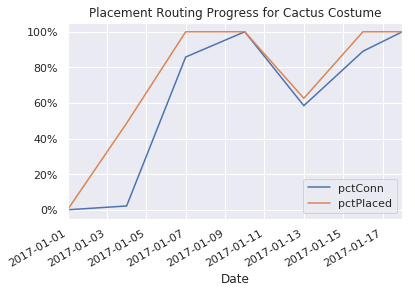

In [4]:
#@title Placement and Routing progress Chart
df['pctPlaced'] = df['Placed']/df['Total_Components']
df['pctConn'] = df['Connected']/df['Connections']
df['Date'] =  pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

ax = df[['pctConn','pctPlaced']].plot(title='Placement Routing Progress for '+project_name)
ax.yaxis.set_major_formatter(FuncFormatter('{0:.0%}'.format))#format y-axis to %



In the above chart,  percentages were  calculated by using the formula-


$Percent Placed = \frac{parts Placed}{TotalComponentCount}$

 $Percent Connected = \frac{Connected}{Connections}$
 
 




# -6- Budget Calculations

First, lets create another calculated field for  Running Total  of the regular hours as time goes on.

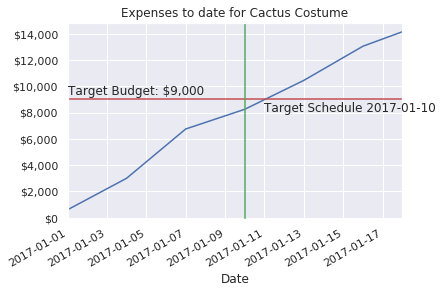

In [5]:
#@title Expenses over time
df['regrunning'] = df['Reg_Hours'].cumsum()
df['otrunning'] = df['OT_Hours'].cumsum()
df['spend'] = df['regrunning']*regular_rate + df['otrunning']*overtime_rate
budget_string = int2dollar(budget)
ax = df['spend'].plot()
#add reference line showing budget target
plt.axhline(y=budget, color='r', linestyle='-')
text(x=df.index.min(), y=budget+budget/25, s="Target Budget: "+ budget_string)

#add reference line showing schedule target
plt.axvline(x=schedule, color='g', linestyle='-')
text(x=(parser.parse(schedule) + pd.Timedelta(days=1)), y=budget*.9, s="Target Schedule "+str(schedule))

plt.title('Expenses to date for '+project_name);
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 



In [6]:
#@title Schedule Bullet Graph
#A simple demonstration of date calculations.

from datetime import date # Import

start_date = date(2019,1,1)
end_date = date.today()
agreement_date = parser.parse(schedule) # schedule was set in the agreement form
days_worked = df.index.max() - df.index.min() # subtract last record date from first
days_worked.days
days4job = agreement_date - df.index.min() # subtract the first recort date from agreement_date
days4job.days
data = [(project_name, days4job.days, days_worked.days)]
limits = [0, days4job.days, days4job.days *2, days4job.days *3]
labels = ["OK", "Late", "Very Late"]
cats = [x[0] for x in data]

#determine if we are late or still have days remaining
if days4job.days > days_worked.days:
  status = str(days4job.days - days_worked.days)+" days remaining"
else:
  status = str(days_worked.days - days4job.days)+" days past due"
  
# Calculate the percentage of schedule days used.             
sch_pct = f'{days_worked.days/days4job.days*100:.2f}' +"% "  

# Make the basic figure...
p=figure(
    title=sch_pct +"Day "+str(days_worked.days)+" on a "+str(days4job.days)+" day project: "+status, 
    plot_height=125, 
    plot_width=500, 
    y_range=cats,
    toolbar_location=None,
)
p.x_range.range_padding = 0
p.grid.grid_line_color = None
p.xaxis[0].ticker.num_minor_ticks = 0

for left, right, color in zip(limits[:-1], limits[1:], PuBu4[::-1]):
    p.hbar(y=cats, left=left, right=right, height=0.8, color=color)
    
perf = [x[2] for x in data]
p.hbar(y=cats, left=0, right=perf, height=0.3, color="gray")

comp = [x[1]for x in data]
p.segment(x0=comp, y0=[(x, -0.5) for x in cats], x1=comp,
          y1=[(x, 0.5) for x in cats], color="Firebrick", line_width=2)

for start, label in zip(limits[:-1], labels):
    p.add_layout(Label(x=start, y=0, text=label, text_font_size="10pt",
                       text_color='black', y_offset=5, x_offset=15))
    
    
p.add_layout(Label(x=start, y=0, text=label, text_font_size="10pt",
                       text_color='black', y_offset=5, x_offset=15)) 

citation = Label(x=days4job.days, y=50,  y_units='screen',
                 text_font_size="8pt", text= "Target "+schedule, render_mode='css', x_offset=5)

p.add_layout(citation)

output_notebook()
show(p)

In [7]:
#@title Expenses Bullet Graph

spend2date = df.loc[df.index.max(),'spend']
b_data = [(project_name, budget, spend2date)]
b_limits = [0, budget, budget *2, budget *3]
b_labels = ["OK", "Over Budget", "Way Over Budget"]
b_cats = [x[0] for x in data]
if budget > spend2date:
  b_status = int2dollar(budget - spend2date)+" budget remaining"
else:
  b_status = int2dollar(spend2date - budget)+" over target"
  
              
budget_pct = f'{spend2date/budget*100:.2f}' +"% "  

bp=figure(
    title=int2dollar(spend2date) +" ("+budget_pct+") spent on a "+int2dollar(budget)+" budget target project: "+b_status, 
    plot_height=125, 
    plot_width=700,  
    y_range=b_cats,
    toolbar_location=None,
)
bp.x_range.range_padding = 0
bp.grid.grid_line_color = None
bp.xaxis[0].ticker.num_minor_ticks = 0


for left, right, color in zip(b_limits[:-1], b_limits[1:], PuBu4[::-1]):
    bp.hbar(y=b_cats, left=left, right=right, height=0.8, color=color)
    
    
b_perf = [x[2] for x in b_data]
bp.hbar(y=b_cats, left=0, right=b_perf, height=0.3, color="gray")

b_comp = [x[1]for x in b_data]
bp.segment(x0=b_comp, y0=[(x, -0.5) for x in b_cats], x1=b_comp,
          y1=[(x, 0.5) for x in b_cats], color="Green", line_width=2)

for start, label in zip(b_limits[:-1], b_labels):
    bp.add_layout(Label(x=start, y=0, text=label, text_font_size="10pt",
                       text_color='black', y_offset=5, x_offset=15))
    
    
bp.add_layout(Label(x=start, y=0, text=label, text_font_size="10pt",
                       text_color='black', y_offset=5, x_offset=15)) 
    

output_notebook()
show(bp)


# Analyzing Changes
To create a change report .<br>
 <br>


*    Look for changes in the number of connections.  
*   Create a change pair. (The row that changed and the row prior) 
*   Analyze several aspects of the change pair
*   Report 




In [8]:
#@title Change Report
report = change_report(df, 'Connections')
if report:
  for change in report:
    cdf = pd.DataFrame.from_records(change,  index=[0])
    print("Stats on Changes to ", project_name)
    print(tabulate(cdf.T,  headers="keys", tablefmt="fancy_grid"))
else:
  print("No Changes")


Stats on Changes to  Cactus Costume
╒════════════════════════════════════╤════════════╕
│                                    │ 0          │
╞════════════════════════════════════╪════════════╡
│ -0- Change Date                    │ 2017-01-13 │
├────────────────────────────────────┼────────────┤
│ -1.0- Connections                  │ 65820      │
├────────────────────────────────────┼────────────┤
│ -1.1- Previous Connections         │ 44190      │
├────────────────────────────────────┼────────────┤
│ -1.2- Diff in Conns                │ 21630      │
├────────────────────────────────────┼────────────┤
│ -1.3- Pct Change Conns             │ 48.95%     │
├────────────────────────────────────┼────────────┤
│ -2.0- Component Count              │ 3588       │
├────────────────────────────────────┼────────────┤
│ -2.1- Previous Comp Count          │ 2946       │
├────────────────────────────────────┼────────────┤
│ -2.2- Diff in Comp Count           │ 642        │
├───────────────────────────

![Thank yoy! ](https://i.imgur.com/yQILRPG.png)